<a href="https://colab.research.google.com/github/anthony-anania/Tree/blob/main/Is_there_a_part_of_Montreal_that_has_a_bigger_public_tree_diversity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anthony Anania & Iris Guan

## Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
trees_df = pd.read_csv("https://data.montreal.ca/dataset/b89fd27d-4b49-461b-8e54-fa2b34a628c4/resource/64e28fe6-ef37-437a-972d-d1d3f1f7d891/download/arbres-publics.csv",
                       usecols=["ESSENCE_ANG","ARROND_NOM","Longitude","Latitude"])

# Analysis

**Checking the loaded data**

In [ ]:
#cheking how many data we have
trees_df.describe()

,Longitude,Latitude
count,327770.000000,327770.000000
mean,-73.612932,45.508088
std,0.178827,0.966878
min,-77.359946,0.455946
25%,-73.641103,45.486470
50%,-73.597403,45.532318
75%,-73.565963,45.565289
max,-24.095309,72.351564


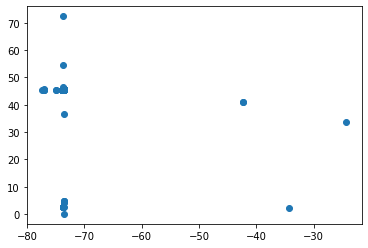

In [ ]:
#initial look at the data
plt.scatter(trees_df["Longitude"],trees_df["Latitude"])
plt.show()

A quick look at the coordinates of the public trees, we see that the distribution does not look like the shape of Montreal island. However, we know that the data are supposed to represent the emplacement of public trees of Montreal and that Montreal has a lot of trees. Therefore, we look for outliers in the data. By looking at the graph, we see some points in longitudes that are bigger than -70 degrees and some points in longitudes relatively close to 80 degrees. We also see that a tree has a latitude bigger than 70 degrees and that some trees have latitudes of less than 40 degrees. We know this can't happen because the longitude of Montreal is -73.6 degrees (73.6 W) and that the latitude of Montreal is 45.5 degrees N. The coordinates of the trees of Montreal should be around those longitude and latitude. We also want to look out for N/A in the data.

In [ ]:
#find number of na
trees_df["Longitude"].isna().sum()
trees_df["Latitude"].isna().sum()

4

In [ ]:
#check the range of longitudes
trees_df.dropna().sort_values("Longitude")

,ARROND_NOM,ESSENCE_ANG,Longitude,Latitude
201746,Ville-Marie,Maidenhair Tree,-77.359946,45.473530
255142,Rivière-des-Prairies - Pointe-aux-Trembles,Golden Colonnade Maidenhair tree,-77.018082,45.602299
271507,LaSalle,Silver Maple,-77.018030,45.372684
27540,Rosemont - La Petite-Patrie,Silver Maple,-77.016144,45.497951
160159,Rosemont - La Petite-Patrie,Ivory Silk Japanese Tree Lilac,-77.009830,45.494551
...,...,...,...,...
63056,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.477543,45.702393
80213,LaSalle,Ulmus x Valley Forge,-42.383870,40.966000
10953,Villeray-Saint-Michel - Parc-Extension,Prairifire Crab Apple,-42.241468,41.038742
130480,Villeray-Saint-Michel - Parc-Extension,Siberian Elm,-34.341727,2.081463


In [ ]:
#check the range of latitudes
trees_df.dropna().sort_values("Latitude")

,ARROND_NOM,ESSENCE_ANG,Longitude,Latitude
152575,Rosemont - La Petite-Patrie,Flame Armur Maple,-73.546741,0.045660
130480,Villeray-Saint-Michel - Parc-Extension,Siberian Elm,-34.341727,2.081463
97299,Saint-Laurent,Red Ash,-73.638517,2.617462
97300,Saint-Laurent,Red Ash,-73.638016,2.617966
97264,Saint-Laurent,Bur Oak,-73.634458,2.621544
...,...,...,...,...
63056,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.477543,45.702393
63057,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.477744,45.702538
316397,Saint-Laurent,Columnare Norway Maple,-73.718525,46.405088
130797,Villeray-Saint-Michel - Parc-Extension,Skyline Honey-Locust,-73.668291,54.532454


**Dropping Outliers and NA**

In [ ]:
#dropping na
trees_df = trees_df.dropna()

In [ ]:
#outliers in longitude and latitude (outside island of Montreal)
trees_df = trees_df[(trees_df["Longitude"]<-73) & (trees_df["Longitude"]>-74)]
trees_df = trees_df[(trees_df["Latitude"]<46) & (trees_df["Latitude"]>45.4)]

Source: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781787123137/5/ch05lvl1sec52/removing-rows-using-boolean-selection#:~:text=Boolean%20selection%20can%20also%20be,expression%20to%20the%20data%20frame

In [ ]:
#checking if the outliers in latitudes have been removed
trees_df.sort_values("Latitude")

,ARROND_NOM,ESSENCE_ANG,Longitude,Latitude
78834,LaSalle,Eastern Cottonwood,-73.629880,45.414656
78836,LaSalle,Eastern Cottonwood,-73.629905,45.414657
78831,LaSalle,Eastern Cottonwood,-73.629751,45.414660
78835,LaSalle,European Mountain Ash,-73.629894,45.414662
78837,LaSalle,Eastern Cottonwood,-73.629917,45.414672
...,...,...,...,...
63059,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.478105,45.702252
63060,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.478243,45.702316
63058,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.478083,45.702359
63056,Rivière-des-Prairies - Pointe-aux-Trembles,Eastern Cottonwood,-73.477543,45.702393


In [ ]:
#checking how many data we have now
trees_df.describe()

,Longitude,Latitude
count,317732.000000,317732.000000
mean,-73.614721,45.529142
std,0.075257,0.058114
min,-73.936771,45.414656
25%,-73.642037,45.485473
50%,-73.598389,45.531943
75%,-73.566812,45.564691
max,-73.477543,45.702538


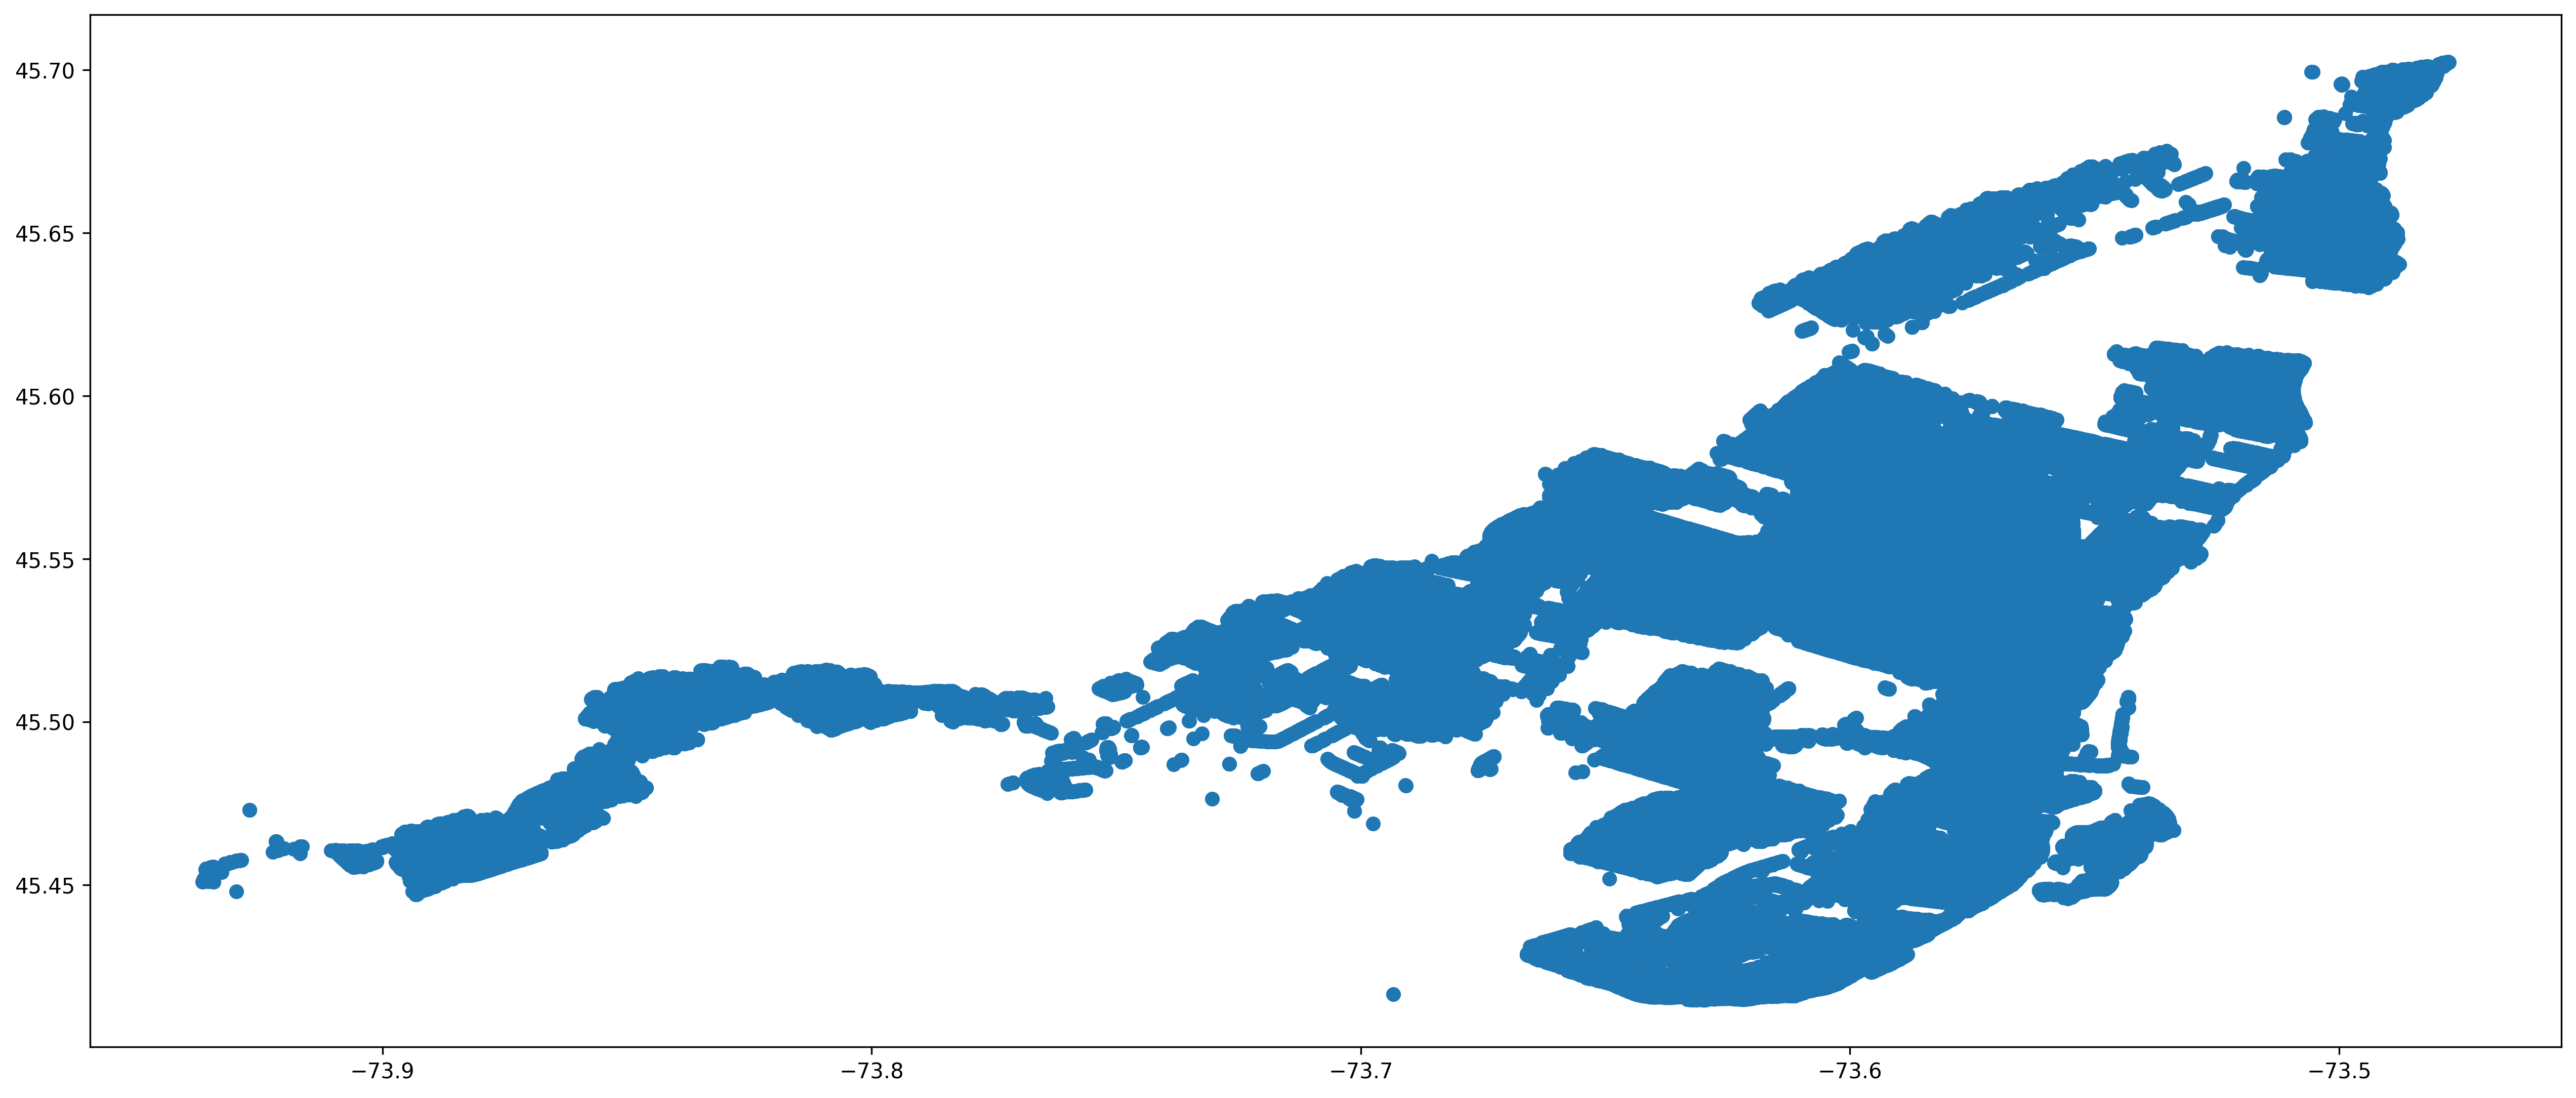

In [ ]:
#checking if data are good after dropping outliers and NA
plt.figure(figsize=[21,9],dpi=300)
plt.scatter(trees_df["Longitude"],trees_df["Latitude"])

plt.show()

After taking care of outliers and N/A, the distribution of public trees looks like the shape of Montreal island, which is what we expect.

**Data Manipulation for Visualization**

In [ ]:
#number of different types of trees in each region
tree_arrond = trees_df.groupby("ARROND_NOM")["ESSENCE_ANG"].nunique()

#approximative location of the center of each region according to their public trees
arrond_loc = trees_df.groupby("ARROND_NOM")["Longitude","Latitude"].mean()

print(tree_arrond)
print(arrond_loc)

ARROND_NOM
Ahuntsic - Cartierville                       353
Anjou                                           3
Côte-des-Neiges - Notre-Dame-de-Grâce         336
LaSalle                                       255
Le Plateau-Mont-Royal                         252
Le Sud-Ouest                                  249
Mercier - Hochelaga-Maisonneuve               351
Montréal-Est                                    2
Pierrefonds - Roxboro                         289
Rivière-des-Prairies - Pointe-aux-Trembles    321
Rosemont - La Petite-Patrie                   401
Saint-Laurent                                 204
Saint-Léonard                                 251
Verdun                                        249
Ville-Marie                                   229
Villeray-Saint-Michel - Parc-Extension        303
Name: ESSENCE_ANG, dtype: int64
                                            Longitude   Latitude
ARROND_NOM                                                      
Ahuntsic - Cartierville    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [ ]:
#creating new data frame to calculate public tree density
tree_per_area = trees_df.groupby("ARROND_NOM").size().to_frame()

In [ ]:
#adding column for area of each region
tree_per_area["area"] = [24.2,13.61,21.4,16.3,8.1,15.7,25.4,14,27,42.3,15.9,42.88,13.52,9.83,16.5,16.5] # from Google search

#adding column for density of public trees
for name in tree_per_area.index:
  tree_per_area.at[name,"density"] = tree_per_area.at[name,0]/tree_per_area.at[name,"area"]

tree_per_area

,0,area,density
ARROND_NOM,,,
Ahuntsic - Cartierville,33862,24.20,1399.256198
Anjou,17,13.61,1.249082
Côte-des-Neiges - Notre-Dame-de-Grâce,26183,21.40,1223.504673
LaSalle,22403,16.30,1374.417178
Le Plateau-Mont-Royal,17134,8.10,2115.308642
Le Sud-Ouest,20483,15.70,1304.649682
Mercier - Hochelaga-Maisonneuve,26927,25.40,1060.118110
Montréal-Est,5,14.00,0.357143
Pierrefonds - Roxboro,16080,27.00,595.555556


# Visualization

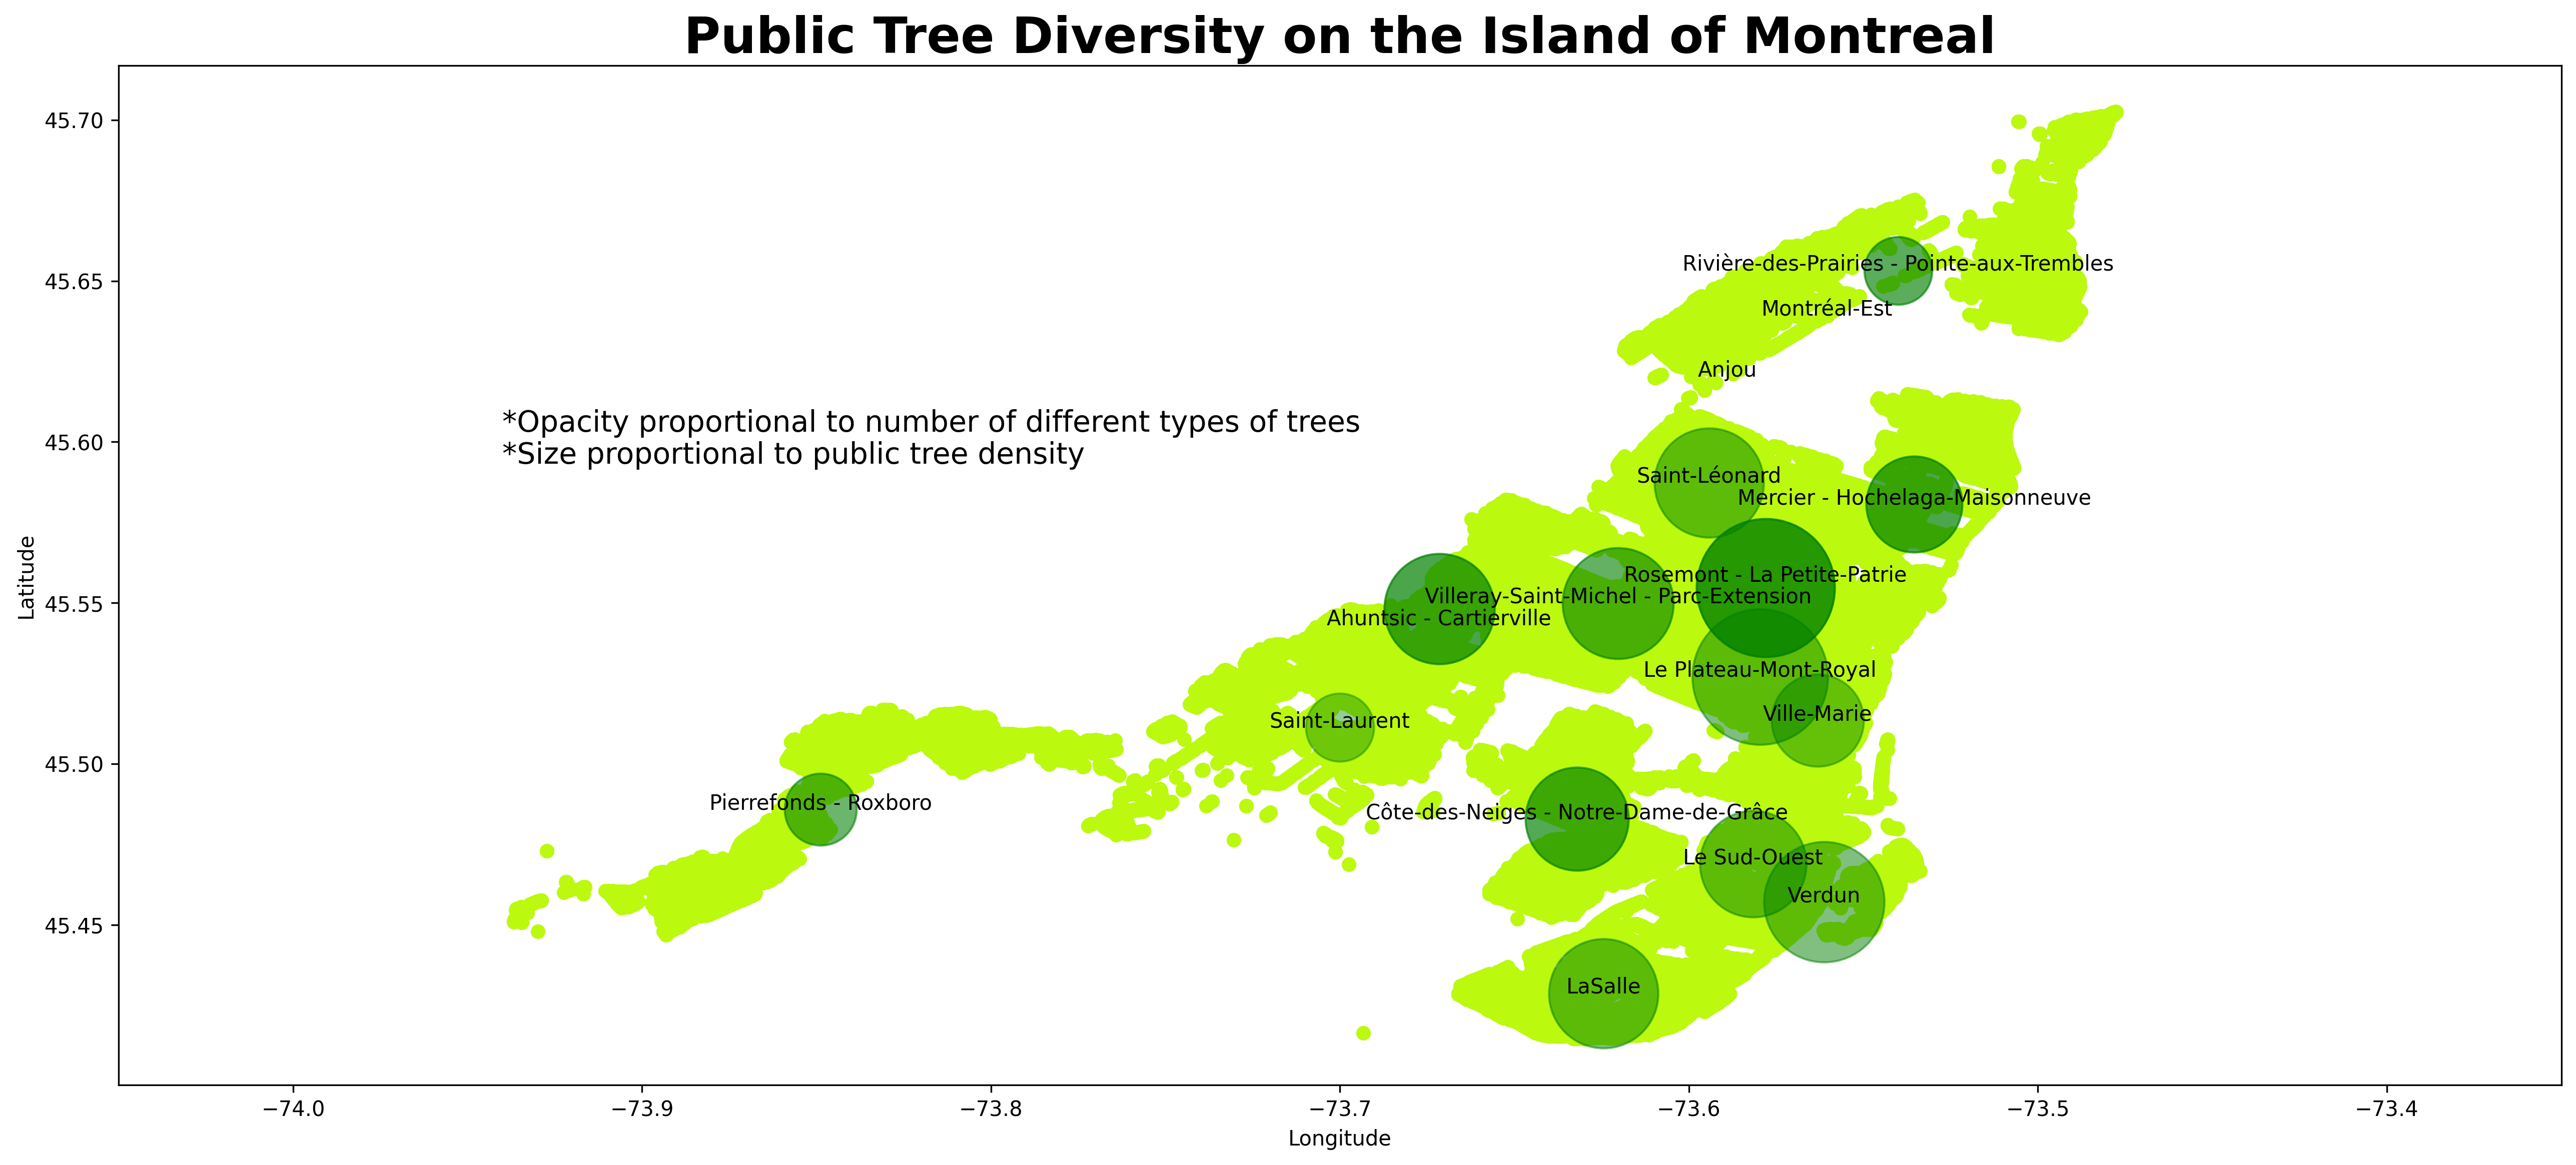

In [ ]:
#configuring the figure
plt.figure(figsize=[21,9],dpi=300)
plt.title("Public Tree Diversity on the Island of Montreal",
          fontdict={
              "weight":"bold",
              "size":24
          })
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.xlim([-74.05,-73.35])

#plot background tree map (and annotation: how to read graph)
plt.scatter(trees_df["Longitude"],trees_df["Latitude"],color="#BBF90F")
plt.annotate("*Opacity proportional to number of different types of trees",
             xy=(arrond_loc.at["Rivière-des-Prairies - Pointe-aux-Trembles","Longitude"]-0.4,
                 arrond_loc.at["Rivière-des-Prairies - Pointe-aux-Trembles","Latitude"]+0.05-0.1),
             size=14)
plt.annotate("*Size proportional to public tree density",
             xy=(arrond_loc.at["Rivière-des-Prairies - Pointe-aux-Trembles","Longitude"]-0.4,
                 arrond_loc.at["Rivière-des-Prairies - Pointe-aux-Trembles","Latitude"]+0.04-0.1),
             size=14)

#plot tree density and tree diversity of each region
for arrond in arrond_loc.index:
  plt.scatter(arrond_loc.at[arrond,"Longitude"],arrond_loc.at[arrond,"Latitude"],
              c="#008000",
              alpha=0.002*tree_arrond[arrond],
              s=2*(tree_per_area.at[arrond,"density"]))

  #annotate region name
  if arrond == "Ahuntsic - Cartierville":
    plt.annotate(arrond,xy=(arrond_loc.at[arrond,"Longitude"],(arrond_loc.at[arrond,"Latitude"]-0.005)),horizontalalignment="center")
  elif arrond == "Rosemont - La Petite-Patrie":
    plt.annotate(arrond,xy=(arrond_loc.at[arrond,"Longitude"],(arrond_loc.at[arrond,"Latitude"]+0.002)),horizontalalignment="center")
  else:
    plt.annotate(arrond,xy=(arrond_loc.at[arrond,"Longitude"],arrond_loc.at[arrond,"Latitude"]),horizontalalignment="center")


plt.show()
